In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Tải dữ liệu MSB


<p>Dữ liệu được lấy từ khảo sát yếu tố tác động đến quyết định gửi tiết kiệm của khách hàng cá nhân tại<strong> Ngân Hàng Thương Mại Cổ Phần Hàng Hải Việt Nam - Chi nhánh Đô Thành</strong></p>
<img src = "image_survey.png"></img>
<p> Thời gian khảo sát : <strong> 26/12/2022 đến 6/1/2023</strong></p>
<p> Phương pháp lấy dữ liệu : <strong>Lấy mẫu với sai số 5%</strong></p>


In [2]:
data = pd.read_excel("MSB_Survey.xlsx")

In [3]:
data.head()

,Giới tính,Công việc hiện tại,Độ tuổi,Trình độ học vấn,Thu nhập mỗi tháng,Hình thức gửi tiết kiệm,Kỳ hạn gửi tiết kiệm,UTTH1,UTTH2,UTTH3,...,CSKH4,CTKM1,CTKM2,CTKM3,CTKM4,CTKM5,QD1,QD2,QD3,QD4
0,Nam,Nhân viên hành chính,18-30,Sau đại học,Từ 10 đến 15 triệu,Tiền gửi tiết kiệm MSB,Dưới 1 năm,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,Nữ,Nhân viên hành chính,18-30,Đại học,Dưới 10 triệu,Tiền gửi có kì hạn online cá nhân,Dưới 1 năm,3,3,3,...,3,3,5,5,3,3,3,3,3,3
2,Nữ,Nhân viên hành chính,18-30,Đại học,Dưới 10 triệu,Tiền gửi tích lũy,Dưới 1 năm,4,3,4,...,4,5,5,4,4,5,1,3,5,4
3,Nữ,Nhân viên hành chính,18-30,Đại học,Từ 10 đến 15 triệu,Tiền gửi có kì hạn online cá nhân,Dưới 1 năm,4,4,4,...,4,5,4,3,4,4,4,4,4,5
4,Nam,"Điều hành, quản lý",31- 40,Đại học,Trên 20 triệu,Tiền gửi thanh toán,Dưới 1 năm,4,4,4,...,4,4,5,4,4,4,4,4,4,4


### Cắt dữ liệu 



<strong> Cắt dữ liệu ra thành hai phần: </strong>
<table>
    <tr>
        <th>Đặc trưng</th>
        <th>Mục tiêu</th>
    </tr>
    <tr>
        <td>Nhân khẩu học</td>
        <td><i>Phân cụm khách hàng thành các nhóm dựa vào đặc điểm nhân khẩu học</i></td>
    </tr>
    <tr>
        <td>Nhân tố tác động</td>
        <td><i>Kiểm định thống kê và xác định các nhân tố hội tụ</i></td>
    </tr>
</table>


In [17]:

persona_data = data.iloc[:,:7]

In [18]:
persona_data.head()

,Giới tính,Công việc hiện tại,Độ tuổi,Trình độ học vấn,Thu nhập mỗi tháng,Hình thức gửi tiết kiệm,Kỳ hạn gửi tiết kiệm
0,Nam,Nhân viên hành chính,18-30,Sau đại học,Từ 10 đến 15 triệu,Tiền gửi tiết kiệm MSB,Dưới 1 năm
1,Nữ,Nhân viên hành chính,18-30,Đại học,Dưới 10 triệu,Tiền gửi có kì hạn online cá nhân,Dưới 1 năm
2,Nữ,Nhân viên hành chính,18-30,Đại học,Dưới 10 triệu,Tiền gửi tích lũy,Dưới 1 năm
3,Nữ,Nhân viên hành chính,18-30,Đại học,Từ 10 đến 15 triệu,Tiền gửi có kì hạn online cá nhân,Dưới 1 năm
4,Nam,"Điều hành, quản lý",31- 40,Đại học,Trên 20 triệu,Tiền gửi thanh toán,Dưới 1 năm


In [19]:
persona_data.columns

Index(['Giới tính', 'Công việc hiện tại', 'Độ tuổi ', 'Trình độ học vấn ',
       'Thu nhập mỗi tháng', 'Hình thức gửi tiết kiệm',
       'Kỳ hạn gửi tiết kiệm'],
      dtype='object')

In [20]:
factor_data = data.drop(persona_data.columns,axis = 1)

In [21]:
factor_data_analyze = factor_data.iloc[:,:35]

In [22]:
factor_net_promoter_score = factor_data.iloc[:,35:]

In [23]:
factor_net_promoter_score.head()

,QD1,QD2,QD3,QD4
0,5,5,5,5
1,3,3,3,3
2,1,3,5,4
3,4,4,4,5
4,4,4,4,4


### Lọc dữ liệu và xử lý dữ liệu thiếu

In [24]:
persona_data.isnull().sum().sum()

0

In [25]:
factor_net_promoter_score.isnull().sum().sum()

0

In [26]:
factor_data_analyze.shape

(382, 35)

In [27]:
factor_data_analyze.isnull().sum().sum()

178

In [28]:
factor_data_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UTTH1   382 non-null    int64  
 1   UTTH2   382 non-null    int64  
 2   UTTH3   382 non-null    int64  
 3   UTTH4   382 non-null    int64  
 4   UTTH5   382 non-null    int64  
 5   UTTH6   382 non-null    int64  
 6   UTTH7   382 non-null    int64  
 7   PLS1    382 non-null    int64  
 8   PLS2    382 non-null    int64  
 9   PLS3    382 non-null    int64  
 10  PLS4    382 non-null    int64  
 11  PLS5    382 non-null    int64  
 12  STT1    382 non-null    int64  
 13  STT2    382 non-null    int64  
 14  STT3    382 non-null    int64  
 15  STT4    382 non-null    int64  
 16  AHNT1   348 non-null    float64
 17  AHNT2   347 non-null    float64
 18  ANHT3   334 non-null    float64
 19  AHNT4   346 non-null    float64
 20  AHNT5   382 non-null    int64  
 21  MAT1    382 non-null    int64  
 22  MA

In [29]:
factor_data_analyze.rename({"ANHT3":"AHNT3"},axis = 1, inplace = True)

In [30]:
col_fill = ["AHNT1","AHNT2","AHNT3","AHNT4","MAT3"]

In [31]:
factor_data_analyze[col_fill] = factor_data_analyze[col_fill].fillna(factor_data_analyze[col_fill].median())

In [32]:
factor_data_analyze.isnull().sum().sum()

0

### Khám phá dữ liệu


In [33]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], ha = 'center', bbox=dict(facecolor='white', alpha=0.5)) # thêm số vào bar chart

my_color = ["deepskyblue", "lightcoral"]

In [34]:
def absolute_value_GT(val):
    a  = np.round((val/100*persona_data['Giới tính'].value_counts().sum()), 0)
    percentage = np.round(a/persona_data['Giới tính'].value_counts().sum() *100,1)
    return percentage # thêm số vào pie chart

In [35]:
persona_data['Giới tính'].value_counts()

 Nữ     237
 Nam    145
Name: Giới tính, dtype: int64

In [36]:
label = ['Nữ','Nam']

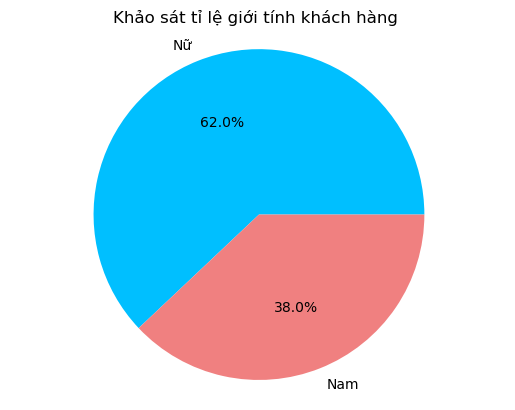

In [37]:
plt.pie(persona_data['Giới tính'].value_counts(),labels = label, colors = my_color,autopct='%1.1f%%'.format(absolute_value_GT), )
plt.title("Khảo sát tỉ lệ giới tính khách hàng ") 
plt.axis('equal')
plt.show()


<strong><u>Nhận xét</u></strong>
<p>Khách hàng trong khảo sát có  237 Khách hàng là Nữ (chiếm 62%) và 145 Khách hàng là Nam (chiếm 38%)</p>

In [38]:
persona_data['Công việc hiện tại'].value_counts()

 Nhân viên hành chính    159
 Tự doanh                120
 Công nhân viên chức      53
 Điều hành, quản lý       50
Name: Công việc hiện tại, dtype: int64

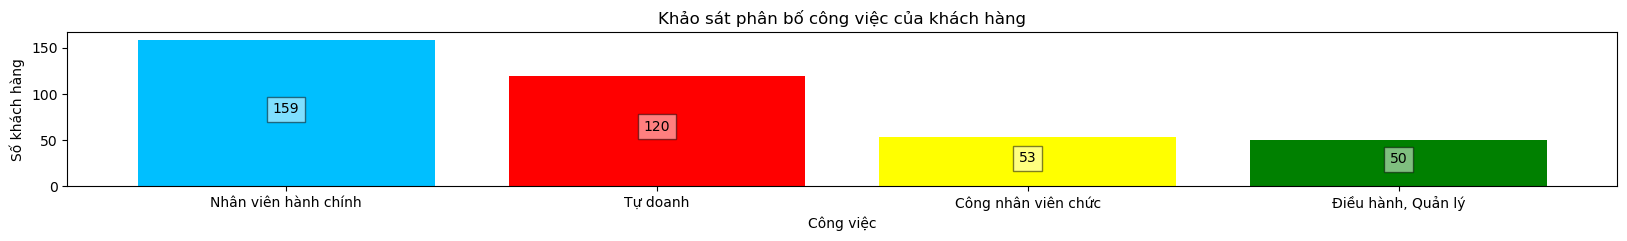

In [39]:
bar_color = ['deepskyblue','red','yellow','green']
job_label = ["Nhân viên hành chính", "Tự doanh","Công nhân viên chức", "Điều hành, Quản lý"]
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
plt.bar(job_label, persona_data['Công việc hiện tại'].value_counts(), color = bar_color)
addlabels(persona_data['Công việc hiện tại'].unique(), persona_data['Công việc hiện tại'].value_counts())
plt.title('Khảo sát phân bố công việc của khách hàng')
plt.xlabel('Công việc')
plt.ylabel('Số khách hàng')

plt.show()


<strong><u>Nhận xét</u>></strong>
<p>Khách hàng trong khảo sát tập trung chủ yếu là Nhân viên hành chính (159), Tự doanh (120),và thiểu số Công nhân viên chức (53),điều hành quản lý (50)</p>

In [40]:
persona_data['Độ tuổi '].value_counts()

 18-30     192
 31- 40    123
 41-50      51
 >50        16
Name: Độ tuổi , dtype: int64

In [41]:
old_label = ['Từ 18 đến 30 tuổi', 'Từ 31 đến 40 tuổi', 'Từ 41 đến 50 tuổi', 'Trên 50 tuổi']

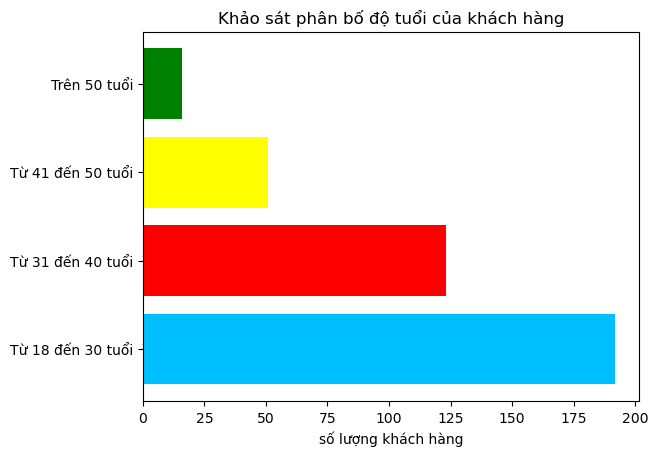

In [42]:

plt.barh(old_label, persona_data['Độ tuổi '].value_counts(), color = bar_color)
plt.title('Khảo sát phân bố độ tuổi của khách hàng')
plt.xlabel('số lượng khách hàng')

plt.show()

<strong><u>Nhận xét</u></strong>
<p>Khách hàng trong khảo sát tập trung chủ yếu ở độ tuổi 18-30 (192 KH), và 31-40 (123 KH), và rất ít khách hàng trên 50 (21 KH)</p>

In [43]:
persona_data['Trình độ học vấn '].value_counts()

 Đại học                173
 Trung cấp, cao đẳng    137
 Phổ thông trung học     52
 Sau đại học             20
Name: Trình độ học vấn , dtype: int64

In [44]:
def absolute_value_HV(val):
    a  = np.round((val/100*persona_data['Trình độ học vấn '].value_counts().sum()), 0)
    percentage = np.round(a/persona_data['Trình độ học vấn '].value_counts().sum() *100,1)
    return percentage # thêm số vào pie chart

In [45]:
label_grade = ["Đại học", " Trung cấp, cao đẳng", "Phổ thông trung học", "Sau đại học"]

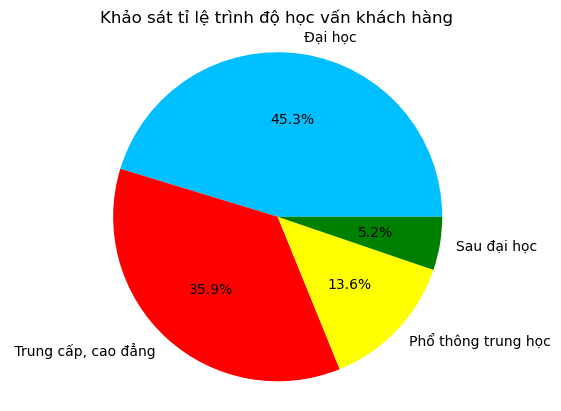

In [46]:
plt.pie(persona_data['Trình độ học vấn '].value_counts(),labels = label_grade, colors = bar_color,autopct='%1.1f%%'.format(absolute_value_HV), )
plt.title("Khảo sát tỉ lệ trình độ học vấn khách hàng") 
plt.axis('equal')
plt.show()

<strong><u>Nhận xét</u></strong>
<p>Khách hàng có trình độ học vấn ở Đại học ( 45.3%) VÀ Trung cấp cao đẳng(35.9%) chiếm phần lớn, và rất ít khách hàng trong khảo sát có trình độ sau đại học (5.2%) </p>

In [47]:
 persona_data['Thu nhập mỗi tháng'].value_counts()

Dưới 10 triệu         116
Trên 20 triệu         111
Từ 10 đến 15 triệu     98
Từ 15 đến 20 triệu     57
Name: Thu nhập mỗi tháng, dtype: int64

In [48]:
label_salary = ["Duới 10 triệu", "Trên 20 triệu", "Từ 10 đến 15 triệu","Từ 15 đến 20 triệu"]

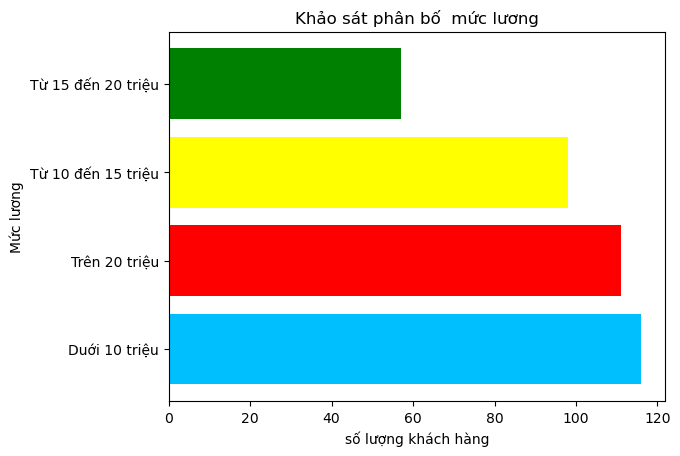

In [49]:
plt.barh(label_salary, persona_data['Thu nhập mỗi tháng'].value_counts(), color = bar_color)
plt.title('Khảo sát phân bố  mức lương')
plt.xlabel('số lượng khách hàng')
plt.ylabel('Mức lương')

plt.show()

<strong><u>Nhận xét</u></strong>
<p>Khách hàng có phân phố tập trung ở mức lức từ Dưới 10 triệu (116 KH), trên 20 triệu (111), Từ 10 đến 15 triệu (98 KH).Khách hàng có mức thu nhập từ 15 -20 triệu (57 KH) có mức phân bố thấp nhất trong khảo sát này với</p>

In [50]:
persona_data['Hình thức gửi tiết kiệm'].value_counts()

 Tiền gửi tiết kiệm MSB               251
 Tiền gửi có kì hạn online cá nhân     64
 Tiền gửi thanh toán                   34
 Tiền gửi tiết kiệm không kỳ hạn       19
 Tiền gửi tích lũy                     14
Name: Hình thức gửi tiết kiệm, dtype: int64

In [51]:
label_method = ['Tiền gửi tiết kiệm MSB','Tiền gửi có kì hạn online cá nhân', 'Tiền gửi thanh toán', 'Tiền gửi tiết kiệm không kỳ hạn', 'Tiền gửi tích lũy']

In [52]:
HT_color = ['deepskyblue','red','yellow','green','pink']

In [53]:
def absolute_value_HT(val):
    a  = np.round((val/100*persona_data['Hình thức gửi tiết kiệm '].value_counts().sum()), 0)
    percentage = np.round(a/persona_data['Hình thức gửi tiết kiệm '].value_counts().sum() *100,1)
    return percentage # thêm số vào pie chart

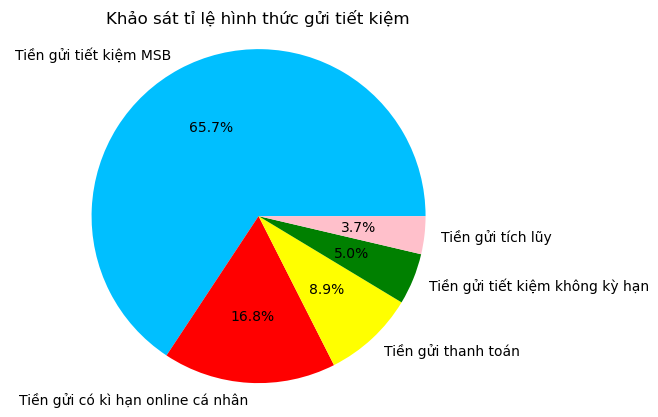

In [54]:
plt.pie(persona_data['Hình thức gửi tiết kiệm'].value_counts(),labels =label_method , colors = HT_color,autopct='%1.1f%%'.format(absolute_value_HT), )
plt.title("Khảo sát tỉ lệ hình thức gửi tiết kiệm") 
plt.axis('equal')
plt.show()

<strong><u>Nhận xét</u></strong>
<p>Khách hàng tập trung chủ yếu vào hình thức gửi tiết kiệm của MSB (65.7%). Rất ít khách hàng chọn lựa việc tiết kiệm không kỳ hạn ( 5.0%) và tiền gửi tích lũy (3.7%)</p>

In [55]:
persona_data['Kỳ hạn gửi tiết kiệm'].value_counts()

Dưới 1 năm        306
Từ 1 đến 2 năm     55
Trên 2 năm         21
Name: Kỳ hạn gửi tiết kiệm, dtype: int64

In [56]:
label_time = ['Dưới 1 năm', 'Từ 1 đến 2 năm', 'Trên 2 năm']

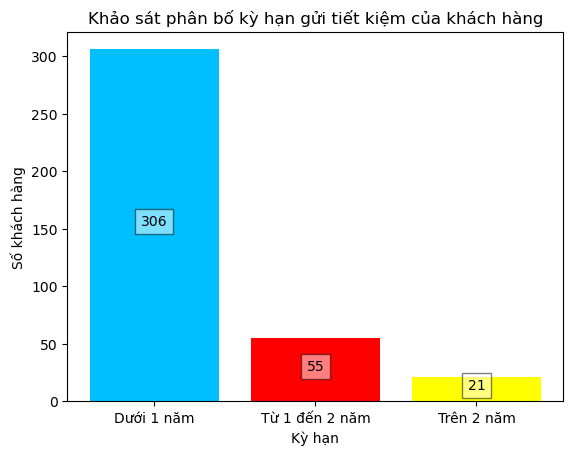

In [57]:
bar_color = ['deepskyblue','red','yellow','green']

plt.bar(label_time, persona_data['Kỳ hạn gửi tiết kiệm'].value_counts(), color = bar_color)
addlabels(persona_data['Kỳ hạn gửi tiết kiệm'].unique(), persona_data['Kỳ hạn gửi tiết kiệm'].value_counts())
plt.title('Khảo sát phân bố kỳ hạn gửi tiết kiệm của khách hàng')
plt.xlabel('Kỳ hạn')
plt.ylabel('Số khách hàng')

plt.show()

<strong><u>Nhận xét</u></strong>
<p>Trong khảo sát, khách hàng tập trung chủ yếu vào kỳ hạn Dưới 1 năm (306 KH), và rất ít khách hàng gửi kỳ hạn trên 2 năm (21 KH)</p>

## Kiểm định cho phân tích nhân tố các câu hỏi khảo sát

#### Kiểm định độ tin cậy với Cronbach's Alpha

<strong><i> Cronbach's Alpha là gì ?</i></strong>
<p>Hệ số tin cậy Cronbach’s Alpha là hệ số cho phép đánh giá mức độ phù hợp khi đưa các biến quan sát nào đó thuộc về một biến nghiên cứu. Tuy nhiên hệ số tin cậy chỉ cho biết các đo lường có liên kết với nhau hay không; để biết được biến quan sát nào không đóng góp nhiều cho sự mô tả của khái niệm cần đo để loại bỏ đi và biến quan sát nào cần giữ lại chúng ta sẽ dựa vào hệ số tương quan biến tổng (Corrected Item - Total Correlation). Cụ thể các tiêu chí trong kiểm định hệ số tin cậy như sau:</p>
<table>
    <tr>
        <th>Khoảng</th>
        <th>Đánh giá</th>
    </tr>
    <tr>
        <td>α >= 0.9</td>
        <td>Thang đo nhân tố rất tốt</td>
    </tr>
    <tr>
        <td>0.9 > α >= 0.8</td>
        <td>Thang đo nhân tố tốt</td>
    </tr>
    <tr>
        <td>0.8 > α >= 0.7</td>
        <td>Thang đo nhân tố chấp nhận được</td>
    </tr>
    <tr>
        <td>0.7 > α >= 0.6</td>
        <td>Chấp nhận được với nghiên cứu mới</td>
    </tr>
    <tr>
        <td>0.6 > α >= 0.5</td>
        <td>Thang đo nhân tố không phù hợp</td>
    </tr>
    <tr>
        <td> α <0.5 </td>
        <td>Thang đo nhân tố không phù hợp</td>
    </tr>
    
    
 
</table>


In [58]:
import pingouin as pg


In [59]:
pg.cronbach_alpha(data=factor_data_analyze)

(0.9535046191850846, array([0.947, 0.96 ]))

<strong><u>Nhận xét: </u></strong>
<p> Với giá trị Cronbach_alpha là 0.9535 với độ tin cậy 95% thì chứng tỏ <strong><i>thang đo nhân tố rất tốt</i></strong> và bước tiếp theo sẽ là phân tích nhân tố khám phá EFA</p>

## Phân tích nhân tố

In [66]:
!pip install factor_analyzer

     ---------------------------------------- 41.8/41.8 kB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 202.3/202.3 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 98.8/98.8 kB ? eta 0:00:00
     ---------------------------------------- 8.7/8.7 MB 9.1 MB/s eta 0:00:00
     -------------------------------------- 468.5/468.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42071 sha256=e0c4207f2a79b68761b0001aaa83071192c08cc50b5bacf1a615da5074c3c1b4
  Stored in directory: c:\users\hieu nguyen\appdata\local\pip\cache\wheels\6d\32\bd\460a71becd83f7d77152f43

In [60]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [61]:
factor_data_analyze.head()

,UTTH1,UTTH2,UTTH3,UTTH4,UTTH5,UTTH6,UTTH7,PLS1,PLS2,PLS3,...,MAT5,CSKH1,CSKH2,CSKH3,CSKH4,CTKM1,CTKM2,CTKM3,CTKM4,CTKM5
0,5,5,5,5,5,5,5,5,5,4,...,5,5,5,5,5,5,5,5,5,5
1,3,3,3,3,3,3,3,3,3,5,...,3,3,3,3,3,3,5,5,3,3
2,4,3,4,3,4,3,4,5,3,3,...,5,4,5,5,4,5,5,4,4,5
3,4,4,4,4,4,4,4,5,5,4,...,5,5,5,5,4,5,4,3,4,4
4,4,4,4,4,4,4,4,4,4,2,...,4,4,4,4,4,4,5,4,4,4


<strong>Các nhân tố phân tích bao gồm: </strong>
<table>
    <tr>
        <th>Viết tắt</th>
        <th>Ý nghĩa</th>
    </tr>
    <tr>
        <td>UTTH</td>
        <td>Uy tín thương hiệu</td>
    </tr>
    <tr>
        <td>PLS</td>
        <td>Lãi suất và chi phí giao dịch</td>
    </tr>
    <tr>
        <td>STT</td>
        <td>Sự thuận tiện</td>
    </tr>
    <tr>
        <td>AHNT</td>
        <td>Ảnh hưởng người thân</td>
    </tr>
    <tr>
        <td>MAT</td>
        <td>Mức độ an toàn</td>
    </tr>
    <tr>
        <td> CSKH </td>
        <td>Chăm sóc khách hàng</td>
    </tr>
    <tr>
        <td> CTKM </td>
        <td>Chương trình khuyến mãi</td>
    </tr>
    
 
</table>


In [62]:
factor_data_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UTTH1   382 non-null    int64  
 1   UTTH2   382 non-null    int64  
 2   UTTH3   382 non-null    int64  
 3   UTTH4   382 non-null    int64  
 4   UTTH5   382 non-null    int64  
 5   UTTH6   382 non-null    int64  
 6   UTTH7   382 non-null    int64  
 7   PLS1    382 non-null    int64  
 8   PLS2    382 non-null    int64  
 9   PLS3    382 non-null    int64  
 10  PLS4    382 non-null    int64  
 11  PLS5    382 non-null    int64  
 12  STT1    382 non-null    int64  
 13  STT2    382 non-null    int64  
 14  STT3    382 non-null    int64  
 15  STT4    382 non-null    int64  
 16  AHNT1   382 non-null    float64
 17  AHNT2   382 non-null    float64
 18  AHNT3   382 non-null    float64
 19  AHNT4   382 non-null    float64
 20  AHNT5   382 non-null    int64  
 21  MAT1    382 non-null    int64  
 22  MA

#### Kiểm định Bartlett ’s

In [63]:
chi_square_value,p_value=calculate_bartlett_sphericity(factor_data_analyze)
chi_square_value, p_value

(8553.861290345067, 0.0)

<strong><u>Nhận xét</u></strong>
<p>Trong thử nghiệm Bartlett này, giá trị p là 0. <strong><i>Thử nghiệm có ý nghĩa thống kê, chỉ ra rằng ma trận tương quan được quan sát không phải là ma trận đồng nhất</i><strong>.

#### Kiểm định Kaiser-Meyer-Olkin (KMO) Test

<p>Kiểm định Kaiser-Meyer-Olkin (KMO) đo lường mức độ phù hợp của dữ liệu để phân tích nhân tố. Nó xác định mức độ phù hợp cho từng biến quan sát và cho toàn bộ mô hình. KMO ước tính tỷ lệ phương sai giữa tất cả các biến quan sát. Id tỷ lệ thấp hơn phù hợp hơn cho phân tích nhân tố. Giá trị KMO nằm trong khoảng từ 0 đến 1. Giá trị KMO nhỏ hơn 0,6 được coi là không đủ.<p>

In [64]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [65]:
kmo_all,kmo_model=calculate_kmo(factor_data_analyze)

C:\Users\Hieu Nguyen\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [66]:
kmo_model

0.9493002680131524

<strong><u>Nhận xét</u></strong>

<p>Giá trị KMO là 0.949 nên có thể kết luận <strong><i>Có thể tiến hành phân tích nhân tố</i></strong></p>

<p>Có 7 nhân tố thế này ta sẽ phân tích các nhân tố với ma trận xoay số lượng là 7 </p>

In [67]:
from factor_analyzer import FactorAnalyzer

In [68]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(7, rotation = 'varimax')

fa.fit(factor_data_analyze)
ev, v = fa.get_eigenvalues()




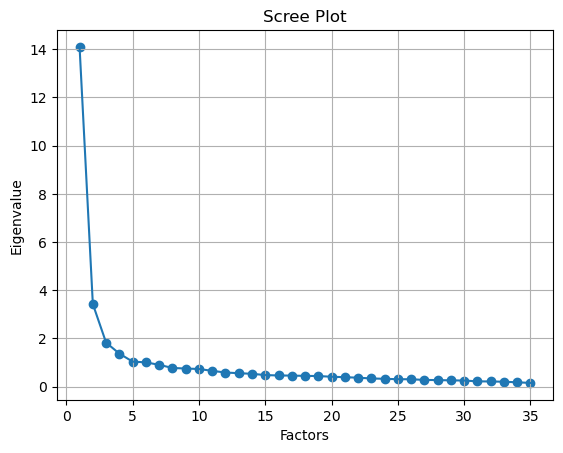

In [69]:
plt.scatter(range(1,factor_data_analyze.shape[1]+1),ev)
plt.plot(range(1,factor_data_analyze.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [70]:
fa.get_factor_variance()

(array([7.78880504, 5.76237415, 1.83383571, 1.70015876, 1.39204628,
        1.27268256, 1.14380174]),
 array([0.22253729, 0.16463926, 0.05239531, 0.04857596, 0.03977275,
        0.03636236, 0.03268005]),
 array([0.22253729, 0.38717655, 0.43957185, 0.48814782, 0.52792057,
        0.56428293, 0.59696298]))

In [71]:
fa.loadings_

array([[ 6.38380138e-01,  5.79451919e-01,  9.82454856e-02,
         4.18469077e-02,  1.86381874e-02, -8.61628672e-02,
         2.58799105e-01],
       [ 7.73121787e-01,  2.63935752e-01, -2.80117737e-02,
         6.07164345e-02,  9.99873073e-02,  9.50057987e-02,
        -1.05592611e-01],
       [ 1.38302227e-01,  7.20057589e-01,  2.20893366e-01,
         1.53812769e-01,  1.60813056e-01, -1.31079419e-04,
         1.16595233e-01],
       [ 2.02773184e-01,  6.99191909e-01,  1.54669296e-01,
         6.90482669e-02,  1.57340767e-01,  1.27554978e-01,
        -3.68403197e-02],
       [ 2.92879936e-01,  6.33058527e-01,  1.50844509e-01,
         6.79687732e-02,  1.39056103e-01,  7.82931768e-02,
        -8.43809594e-02],
       [ 3.43508425e-01,  5.68383609e-01,  4.78870014e-02,
         5.18899083e-02,  7.62809130e-02,  2.00453242e-01,
         1.40906301e-01],
       [ 6.34220056e-01,  4.65889150e-01,  4.56223705e-02,
         4.19310724e-03,  6.84357232e-02,  3.67238605e-02,
         4.7921640

In [72]:

fa_loading_df = pd.DataFrame(fa.loadings_, columns=['UTTH', 'PLS', 'STT', 'AHNT', 'MAT','CSKH','CTKM'])

In [73]:
fa_loading_df

,UTTH,PLS,STT,AHNT,MAT,CSKH,CTKM
0,0.638380,0.579452,0.098245,0.041847,0.018638,-0.086163,0.258799
1,0.773122,0.263936,-0.028012,0.060716,0.099987,0.095006,-0.105593
2,0.138302,0.720058,0.220893,0.153813,0.160813,-0.000131,0.116595
3,0.202773,0.699192,0.154669,0.069048,0.157341,0.127555,-0.036840
4,0.292880,0.633059,0.150845,0.067969,0.139056,0.078293,-0.084381
5,0.343508,0.568384,0.047887,0.051890,0.076281,0.200453,0.140906
6,0.634220,0.465889,0.045622,0.004193,0.068436,0.036724,0.047922
7,0.149576,0.586649,0.271610,0.175897,0.064820,0.205301,0.077257
8,0.214006,0.606634,0.161398,0.147438,0.144316,0.123897,0.036118
9,0.339542,0.461409,0.100868,0.145051,0.034573,0.069980,0.237267


<strong><u> Nhận xét</u></strong>

<p>Dựa vào ma trận phân tích nhân tố, ta chọn lựa được các yếu tố đáng tin cậy để phân tích như sau (loadings_factor >= 0.3):</p>
<table>
    <tr>
        <th>Yếu tố</th>
        <th> Đặc trưng </th>
    </tr>
    <tr>
        <td>UTTH</td>
        <td>Nhân viên MSB CN Đô Thành luôn chân thật - UTTH2 </td>
    </tr>
    <tr>
        <td>UTTH</td>
        <td>MSB CN Đô Thành có danh tiếng - UTTH1 </td>
    </tr>
    <tr>
        <td>UTTH</td>
        <td>MSB là thương hiệu toàn quốc -UTTH7 </td>
    </tr>
    <tr>
        <td>UTTH</td>
        <td>MSB luôn dẫn đầu trong các công tác xã hội - UTTH6 </td>
    </tr>
    <tr>
        <td>PLS</td>
        <td>Lãi suất tiền gửi tiết kiệm của MSB xu hướng cao hơn những ngân hàng khác - PLS2 </td>
    </tr>
    <tr>
        <td>PLS</td>
        <td>Các loại phí dịch vụ mở sổ tiết kiệm (phí kiểm đếm, phí nộp tiền …) của MSB áp dụng thích hợp -PLS1 </td>
    </tr>
    <tr>
        <td>PLS</td>
        <td>MSB có lãi suất phù hợp -PLS4 </td>
    </tr>
    <tr>
        <td>PLS</td>
        <td>MSB - CN Đô Thành thường xuyên có đệ trình lãi suất ưu đãi cho khách hàng cũ- PLS3  </td>
    </tr>
    <tr>
        <td>PLS</td>
        <td>MSB có lãi suất gửi tiền tiết kiệm ít biến động -PLS5 </td>
    </tr>
    
 
</table>


In [74]:
new_factor_data = factor_data_analyze[['UTTH2','UTTH1','UTTH7','UTTH6','PLS2','PLS1','PLS4','PLS3','PLS5']]

### Kiểm định và phân tích quyết định 

In [75]:
pg.cronbach_alpha(data=factor_net_promoter_score)

(0.8785622881745605, array([0.857, 0.897]))

In [76]:
chi_square_value,p_value=calculate_bartlett_sphericity(factor_net_promoter_score)
chi_square_value, p_value

(784.9724747149804, 2.7178456938504585e-166)

In [77]:
kmo_all,kmo_model=calculate_kmo(factor_net_promoter_score)

In [78]:
kmo_model

0.8331935236437767

In [79]:
fa = FactorAnalyzer(1, rotation = 'varimax')

fa.fit(factor_net_promoter_score)
ev, v = fa.get_eigenvalues()

C:\Users\Hieu Nguyen\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


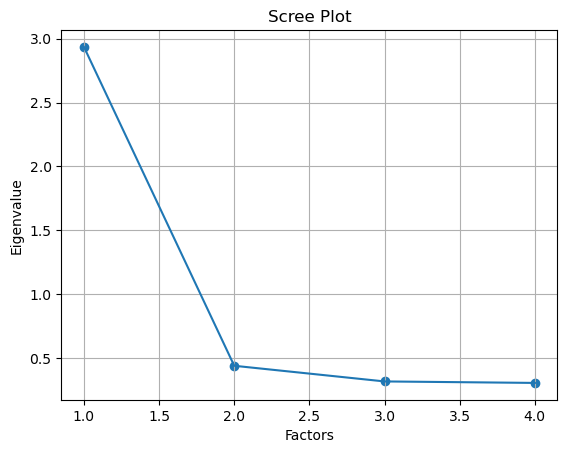

In [80]:
plt.scatter(range(1,factor_net_promoter_score.shape[1]+1),ev)
plt.plot(range(1,factor_net_promoter_score.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [81]:
fa_loading_df_NPS = pd.DataFrame(fa.loadings_, columns=['Quyết định'])

In [82]:
fa_loading_df_NPS

,Quyết định
0,-0.828317
1,-0.846774
2,-0.736327
3,-0.801194


<strong><u>Nhận xét</u></strong>
<p>Dựa vào phân tích các nhân tố quyết định sẽ được các đầu ra có ảnh hưởng như sau: </p>
<table>
    <tr>
        <th>Quyết định</th>
        <th> Đặc trưng </th>
    </tr>
    <tr>
        <td>Quyết định 1</td>
        <td>Tôi đã, đang và sẽ giao dịch tiền gửi tại MSB  </td>
    </tr>
    <tr>
        <td>Quyết định 2</td>
        <td>Tôi không phân vân khi gửi tiết kiệm tại MSB CN Đô Thành</td>
    </tr>
    <tr>
        <td>Quyết định 3</td>
        <td>Tôi tin rằng MSB - CN Đô Thành là nơi quyết định sáng suốt cho gửi tiền </td>
    </tr>
    <tr>
        <td>Quyết định 4</td>
        <td>Tôi sẽ giới thiệu những người có mối quan hệ gần gũi, thân thiết gửi tiền tiết kiệm tại MSB - CN Đô Thành </td>
    </tr>
</table>

### Biến đổi dữ liệu

In [83]:
data_master = pd.concat([persona_data,new_factor_data,factor_net_promoter_score],axis =1)

In [84]:
data_master.head(5)

,Giới tính,Công việc hiện tại,Độ tuổi,Trình độ học vấn,Thu nhập mỗi tháng,Hình thức gửi tiết kiệm,Kỳ hạn gửi tiết kiệm,UTTH2,UTTH1,UTTH7,UTTH6,PLS2,PLS1,PLS4,PLS3,PLS5,QD1,QD2,QD3,QD4
0,Nam,Nhân viên hành chính,18-30,Sau đại học,Từ 10 đến 15 triệu,Tiền gửi tiết kiệm MSB,Dưới 1 năm,5,5,5,5,5,5,5,4,5,5,5,5,5
1,Nữ,Nhân viên hành chính,18-30,Đại học,Dưới 10 triệu,Tiền gửi có kì hạn online cá nhân,Dưới 1 năm,3,3,3,3,3,3,4,5,3,3,3,3,3
2,Nữ,Nhân viên hành chính,18-30,Đại học,Dưới 10 triệu,Tiền gửi tích lũy,Dưới 1 năm,3,4,4,3,3,5,5,3,3,1,3,5,4
3,Nữ,Nhân viên hành chính,18-30,Đại học,Từ 10 đến 15 triệu,Tiền gửi có kì hạn online cá nhân,Dưới 1 năm,4,4,4,4,5,5,4,4,5,4,4,4,5
4,Nam,"Điều hành, quản lý",31- 40,Đại học,Trên 20 triệu,Tiền gửi thanh toán,Dưới 1 năm,4,4,4,4,4,4,5,2,4,4,4,4,4


In [71]:
data_master.to_excel('Master_data.xlsx', index = False)

## Khảo sát sự khác biệt của các đặc điểm nhân khẩu học và hành vi khách hàng với quyết định gửi tiết kiệm ở Ngân hàng MSB chi nhánh Đô Thành

<p><strong><u>H0: </u></strong>Không có sự khác biệt giữa các nhóm trong quyết định gửi tiết kiệm </p>
<p><strong><u>H1: </u></strong> Quyết định gửi tiết kiệm trong các nhóm là khác biệt</p>

<table>
    <tr>
        <th>Mức độ</th>
        <th> Chú giải </th>
    </tr>
    <tr>
        <td>1</td>
        <td>Rất không đồng ý </td>
    </tr>
    <tr>
        <td> 2</td>
        <td>Không đồng ý</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Trung lập </td>
    </tr>
    <tr>
        <td>4</td>
        <td>Đồng ý </td>
    </tr>
     <tr>
        <td>5</td>
        <td>Rất Đồng ý </td>
    </tr>
</table>

In [220]:
statics_data = pd.read_excel('Master_data.xlsx',sheet_name = 'test')

In [221]:
statics_data.shape

(382, 11)

In [222]:
statics_data.head()

,Sex,Job,Old,Study,Salary,Method,Time,QD1,QD2,QD3,QD4
0,Nam,Nhân viên hành chính,Từ 18 đến 30,Sau đại học,Từ 10 đến 15 triệu,Tiền gửi tiết kiệm MSB,Dưới 1 năm,5,5,5,5
1,Nữ,Nhân viên hành chính,Từ 18 đến 30,Đại học,Dưới 10 triệu,Tiền gửi có kì hạn online cá nhân,Dưới 1 năm,3,3,3,3
2,Nữ,Nhân viên hành chính,Từ 18 đến 30,Đại học,Dưới 10 triệu,Tiền gửi tích lũy,Dưới 1 năm,1,3,5,4
3,Nữ,Nhân viên hành chính,Từ 18 đến 30,Đại học,Từ 10 đến 15 triệu,Tiền gửi có kì hạn online cá nhân,Dưới 1 năm,4,4,4,5
4,Nam,"Điều hành, quản lý",Từ 31 đến 40,Đại học,Trên 20 triệu,Tiền gửi thanh toán,Dưới 1 năm,4,4,4,4


In [223]:
stt_data = statics_data.copy()

In [224]:
stt_data.columns

Index(['Sex', 'Job', 'Old', 'Study', 'Salary', 'Method', 'Time', 'QD1', 'QD2',
       'QD3', 'QD4'],
      dtype='object')

### Kiểm định thống kê


### Quyết định 1 : Tôi đã, đang và sẽ giao dịch tiền gửi tại MSB </strong>

In [225]:
from scipy.stats import f_oneway

<strong>Nhân khẩu học và hành vi </strong>

<strong>Giới tính</strong>

In [226]:
df_Sex = stt_data[["Sex", "QD1"]]

In [227]:
Categorical_Sex = df_Sex.groupby('Sex')['QD1'].apply(list)

In [228]:
AnovaResults = f_oneway(*Categorical_Sex)

In [229]:
print('P-value for Anova is: ', AnovaResults[1])

P-value for Anova is:  0.15500453574154388


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định đã, đang và sẽ giao dịch tiền gửi tại MSB của đặc trưng giới tính của khách hàng</p>

<strong>Công việc hiện tại</strong>

In [246]:
df_job = stt_data[['Job','QD1']]

In [232]:
Categorical_Job = df_job.groupby('Job')['QD1'].apply(list)
AnovaResult_Job = f_oneway(*Categorical_Job)
print('p-value for Anova is: ', AnovaResult_Job[1])

p-value for Anova is:  0.06764331899444576


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định đã, đang và sẽ giao dịch tiền gửi tại MSB của đặc trưng công việc của khách hàng</p>

<strong>Độ tuổi</strong>

In [234]:
df_old = stt_data[['Old','QD1']]

In [235]:
df_old

,Old,QD1
0,Từ 18 đến 30,5
1,Từ 18 đến 30,3
2,Từ 18 đến 30,1
3,Từ 18 đến 30,4
4,Từ 31 đến 40,4
...,...,...
377,Từ 31 đến 40,5
378,Từ 41 đến 50,4
379,Từ 31 đến 40,4
380,Từ 41 đến 50,5


In [236]:
Categorical_old = df_old.groupby('Old')['QD1'].apply(list)


In [237]:
AnovaResult_old = f_oneway(*Categorical_old)
print('p-value for Anova is: ', AnovaResult_old[1])

p-value for Anova is:  0.00152513744666269


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định đã, đang và sẽ gửi tiền tiết kiệm tại MSB chi nhánh Đô Thành với những khách hàng có độ tuổi khác nhau </p>

<strong>Trình độ </strong>

In [262]:
df_grade = stt_data[['Study','QD1']]

In [263]:
Categorical_study = df_grade.groupby('Study')['QD1'].apply(list)

In [264]:
AnovaResult_grade = f_oneway(*Categorical_study)
print('p-value for Anova is: ', AnovaResult_grade[1])

p-value for Anova is:  0.18917066026383325


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định đã, đang và sẽ giao dịch tiền gửi tại MSB của đặc trưng trình độ của khách hàng</p>

<strong>Mức lương </strong>

In [250]:
df_salary = stt_data[["Salary", "QD1"]]

In [252]:
Categorical_Salary = df_salary.groupby("Salary")['QD1'].apply(list)
AnovaResult_Salary = f_oneway(*Categorical_Salary)
print('p-value for Anova is: ', AnovaResult_Salary[1])

p-value for Anova is:  0.006702956880183896


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định đã, đang và sẽ gửi tiền tiết kiệm tại MSB chi nhánh Đô Thành với những khách hàng có mức lương khác nhau </p>

<strong>Phương thức</strong>

In [280]:
df_method = stt_data[["Method", "QD1"]]

In [281]:
Categorical_method = df_method.groupby("Method")['QD1'].apply(list)
AnovaResult_method = f_oneway(*Categorical_method)
print('p-value for Anova is: ', AnovaResult_method[1])

p-value for Anova is:  2.071705744761188e-06


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định đã, đang và sẽ gửi tiền tiết kiệm tại MSB chi nhánh Đô Thành với những khách hàng có hình thức gửi tiền khác nhau </p>

<strong>Kỳ hạn</strong>

In [257]:
df_time= stt_data[["Time", "QD1"]]

In [260]:
Categorical_time = df_time.groupby('Time')['QD1'].apply(list)
AnovaResult_time = f_oneway(*Categorical_time)
print('p-value for Anova is: ', AnovaResult_time[1])

p-value for Anova is:  0.051440975075947144


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định đã, đang và sẽ giao dịch tiền gửi tại MSB của đặc trưng kỳ hạn gửi tiền của khách hàng</p>

### Quyết định 2 : Tôi không phân vân khi gửi tiết kiệm tại MSB CN Đô Thành

<strong>Nhân khẩu học và hành vi </strong>

<strong> Giới tính </strong>

In [267]:
df_Sex = stt_data[["Sex", "QD2"]]

In [268]:
Categorical_Sex = df_Sex.groupby('Sex')['QD2'].apply(list)
AnovaResults = f_oneway(*Categorical_Sex)
print('P-value for Anova is: ', AnovaResults[1])

P-value for Anova is:  0.5453147720259204


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định không phân vân khi gửi tiền tại MSB của đặc trưng giới tính của khách hàng</p>

<strong>Công việc</strong>

In [269]:
df_job = stt_data[['Job','QD2']]
Categorical_Job = df_job.groupby('Job')['QD2'].apply(list)
AnovaResult_Job = f_oneway(*Categorical_Job)
print('p-value for Anova is: ', AnovaResult_Job[1])

p-value for Anova is:  0.01846222608452409


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định không phân vân khi gửi tiền tại MSB chi nhánh Đô Thành với những khách hàng có công việc khác nhau </p>

<strong>Độ tuổi</strong>

In [272]:
df_old = stt_data[['Old','QD2']]
Categorical_old = df_old.groupby('Old')['QD2'].apply(list)
AnovaResult_old = f_oneway(*Categorical_old)
print('p-value for Anova is: ', AnovaResult_old[1])

p-value for Anova is:  0.0006394143901818898


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định không phân vân khi gửi tiền tại MSB chi nhánh Đô Thành với những khách hàng có độ tuổi khác nhau </p>

<strong>Trình độ</strong>


In [273]:
df_grade = stt_data[['Study','QD2']]
Categorical_study = df_grade.groupby('Study')['QD2'].apply(list)
AnovaResult_grade = f_oneway(*Categorical_study)
print('p-value for Anova is: ', AnovaResult_grade[1])

p-value for Anova is:  0.15243032633131534


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định không phân vân khi gửi tiền tại MSB của đặc trưng trình độ học vấn của khách hàng</p>

<strong>Mức lương </strong>

In [275]:
df_salary = stt_data[["Salary", "QD2"]]
Categorical_Salary = df_salary.groupby("Salary")['QD2'].apply(list)
AnovaResult_Salary = f_oneway(*Categorical_Salary)
print('p-value for Anova is: ', AnovaResult_Salary[1])

p-value for Anova is:  0.009397358641281616


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định không phân vân khi gửi tiền tại MSB chi nhánh Đô Thành với những khách hàng có mức lương khác nhau </p>

<strong>Phương thức</strong>

In [278]:
df_method = stt_data[["Method", "QD2"]]
Categorical_method = df_method.groupby("Method")['QD2'].apply(list)
AnovaResult_method = f_oneway(*Categorical_method)
print('p-value for Anova is: ', AnovaResult_method[1])

p-value for Anova is:  0.0019099025724204001


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định không phân vân khi gửi tiền tại MSB chi nhánh Đô Thành với những khách hàng có hình thức gửi tiền khác nhau </p>

<strong>Kỳ hạn gửi</strong>

In [283]:
df_time= stt_data[["Time", "QD2"]]
Categorical_time = df_time.groupby('Time')['QD2'].apply(list)
AnovaResult_time = f_oneway(*Categorical_time)
print('p-value for Anova is: ', AnovaResult_time[1])


p-value for Anova is:  0.011930187441648435


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định không phân vân khi gửi tiền tại MSB chi nhánh Đô Thành với những khách hàng có thời hạn gửi tiền khác nhau </p>

### Quyết định 3: Tôi tin rằng MSB - CN Đô Thành là nơi quyết định sáng suốt cho gửi tiền

<strong>Nhân khẩu học và hành vi</strong>

<strong>Giới tính </strong>

In [287]:
df_Sex = stt_data[["Sex", "QD3"]]
Categorical_Sex = df_Sex.groupby('Sex')['QD3'].apply(list)
AnovaResults = f_oneway(*Categorical_Sex)
print('P-value for Anova is: ', AnovaResults[1])

P-value for Anova is:  0.39884159162430977


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định tin rằng MSB là nơi quyết định sáng suốt cho gửi tiền của đặc trưng giới tính của khách hàng</p>

<strong>Công việc</strong> 

In [289]:
df_job = stt_data[['Job','QD3']]
Categorical_Job = df_job.groupby('Job')['QD3'].apply(list)
AnovaResult_Job = f_oneway(*Categorical_Job)
print('p-value for Anova is: ', AnovaResult_Job[1])

p-value for Anova is:  0.7175494443280028


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định tin rằng MSB là nơi quyết định sáng suốt cho gửi tiền của đặc trưng công việc của khách hàng</p>

<strong>Độ tuổi</strong>

In [290]:
df_old = stt_data[['Old','QD3']]
Categorical_old = df_old.groupby('Old')['QD3'].apply(list)
AnovaResult_old = f_oneway(*Categorical_old)
print('p-value for Anova is: ', AnovaResult_old[1])

p-value for Anova is:  0.07288213194517867


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định tin rằng MSB là nơi quyết định sáng suốt cho gửi tiền của đặc trưng độ tuổi của khách hàng</p>

<strong>Trình độ</strong>

In [293]:
df_grade = stt_data[['Study','QD3']]
Categorical_study = df_grade.groupby('Study')['QD3'].apply(list)
AnovaResult_grade = f_oneway(*Categorical_study)
print('p-value for Anova is: ', AnovaResult_grade[1])

p-value for Anova is:  0.09034483236129799


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định tin rằng MSB là nơi quyết định sáng suốt cho gửi tiền của đặc trưng trình độ của khách hàng</p>

<strong>Mức lương </strong>

In [295]:
df_salary = stt_data[["Salary", "QD3"]]
Categorical_Salary = df_salary.groupby("Salary")['QD3'].apply(list)
AnovaResult_Salary = f_oneway(*Categorical_Salary)
print('p-value for Anova is: ', AnovaResult_Salary[1])

p-value for Anova is:  0.015376701091499191


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định tin tưởng lựa chọn khi gửi tiền tại MSB chi nhánh Đô Thành là sáng suốt với những khách hàng có mức lương khác nhau </p>

<strong>Phương thức</strong>

In [297]:
df_method = stt_data[["Method", "QD3"]]
Categorical_method = df_method.groupby("Method")['QD3'].apply(list)
AnovaResult_method = f_oneway(*Categorical_method)
print('p-value for Anova is: ', AnovaResult_method[1])

p-value for Anova is:  0.009379524154535294


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định tin tưởng lựa chọn khi gửi tiền tại MSB chi nhánh Đô Thành là sáng suốt với những khách hàng có phương thức gửi tiền khác nhau </p>

<strong>Kỳ hạn gửi</strong>

In [299]:
df_time= stt_data[["Time", "QD3"]]
Categorical_time = df_time.groupby('Time')['QD3'].apply(list)
AnovaResult_time = f_oneway(*Categorical_time)
print('p-value for Anova is: ', AnovaResult_time[1])

p-value for Anova is:  0.04430364572565748


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định tin tưởng lựa chọn khi gửi tiền tại MSB chi nhánh Đô Thành là sáng suốt với những khách hàng có kỳ hạn gửi tiền khác nhau </p>

### Quyết định 4 : Tôi sẽ giới thiệu những người có mối quan hệ gần gũi, thân thiết gửi tiền tiết kiệm tại MSB - CN Đô Thành

<strong>Đặc điểm nhân khẩu học và hành vi</strong>

<strong>Giới tính </strong>

In [302]:
df_Sex = stt_data[["Sex", "QD4"]]
Categorical_Sex = df_Sex.groupby('Sex')['QD4'].apply(list)
AnovaResults = f_oneway(*Categorical_Sex)
print('P-value for Anova is: ', AnovaResults[1])

P-value for Anova is:  0.18320852687926173


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định giới thiệu người thân bạn bè của đặc trưng giới tính của khách hàng</p>

<strong>Công việc</strong> 

In [305]:
df_job = stt_data[['Job','QD4']]
Categorical_Job = df_job.groupby('Job')['QD4'].apply(list)
AnovaResult_Job = f_oneway(*Categorical_Job)
print('p-value for Anova is: ', AnovaResult_Job[1])

p-value for Anova is:  0.08486525037367414


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định giới thiệu người thân bạn bè của đặc trưng công việc của khách hàng</p>

<strong>Độ tuổi</strong>

In [308]:
df_old = stt_data[['Old','QD4']]
Categorical_old = df_old.groupby('Old')['QD4'].apply(list)
AnovaResult_old = f_oneway(*Categorical_old)
print('p-value for Anova is: ', AnovaResult_old[1])

p-value for Anova is:  0.011926582117324553


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định giới thiệu cho người thân bạn bè với những khách hàng có độ tuổi  khác nhau </p>

<strong>Trình độ</strong>

In [309]:
df_grade = stt_data[['Study','QD3']]
Categorical_study = df_grade.groupby('Study')['QD3'].apply(list)
AnovaResult_grade = f_oneway(*Categorical_study)
print('p-value for Anova is: ', AnovaResult_grade[1])

p-value for Anova is:  0.09034483236129799


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định giới thiệu người thân bạn bè của đặc trưng trình độ của khách hàng</p>

<strong>Mức lương</strong>

In [312]:
df_salary = stt_data[["Salary", "QD4"]]
Categorical_Salary = df_salary.groupby("Salary")['QD4'].apply(list)
AnovaResult_Salary = f_oneway(*Categorical_Salary)
print('p-value for Anova is: ', AnovaResult_Salary[1])

p-value for Anova is:  0.28430079312330575


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định giới thiệu người thân bạn bè của đặc trưng mức lương của khách hàng</p>

<strong>Phương thức</strong>

In [314]:
df_method = stt_data[["Method", "QD4"]]
Categorical_method = df_method.groupby("Method")['QD4'].apply(list)
AnovaResult_method = f_oneway(*Categorical_method)
print('p-value for Anova is: ', AnovaResult_method[1])

p-value for Anova is:  0.1407396724534009


<strong><u>Nhận xét</u></strong>
<p>Vì P-value > 0.05 thế nên không thể bác bỏ H0, nên không tìm ra sự khác biệt trong quyết định giới thiệu người thân bạn bè của đặc trưng mức lương của khách hàng</p>

<strong>Kỳ hạn gửi</strong>

In [316]:
df_time= stt_data[["Time", "QD4"]]
Categorical_time = df_time.groupby('Time')['QD4'].apply(list)
AnovaResult_time = f_oneway(*Categorical_time)
print('p-value for Anova is: ', AnovaResult_time[1])

p-value for Anova is:  0.007214707681874079


<strong><u>Nhận xét: </u></strong>
<p>Vì p-value nhỏ hơn 0.05, nên bác bỏ H0 và chấp nhận H1. Có sự khác biệt giữa quyết định giới thiệu cho người thân bạn bè với những khách hàng có kỳ hạn gửi khác nhau </p>